# Problem Statement:


### Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health

# Dataset Description:


##### 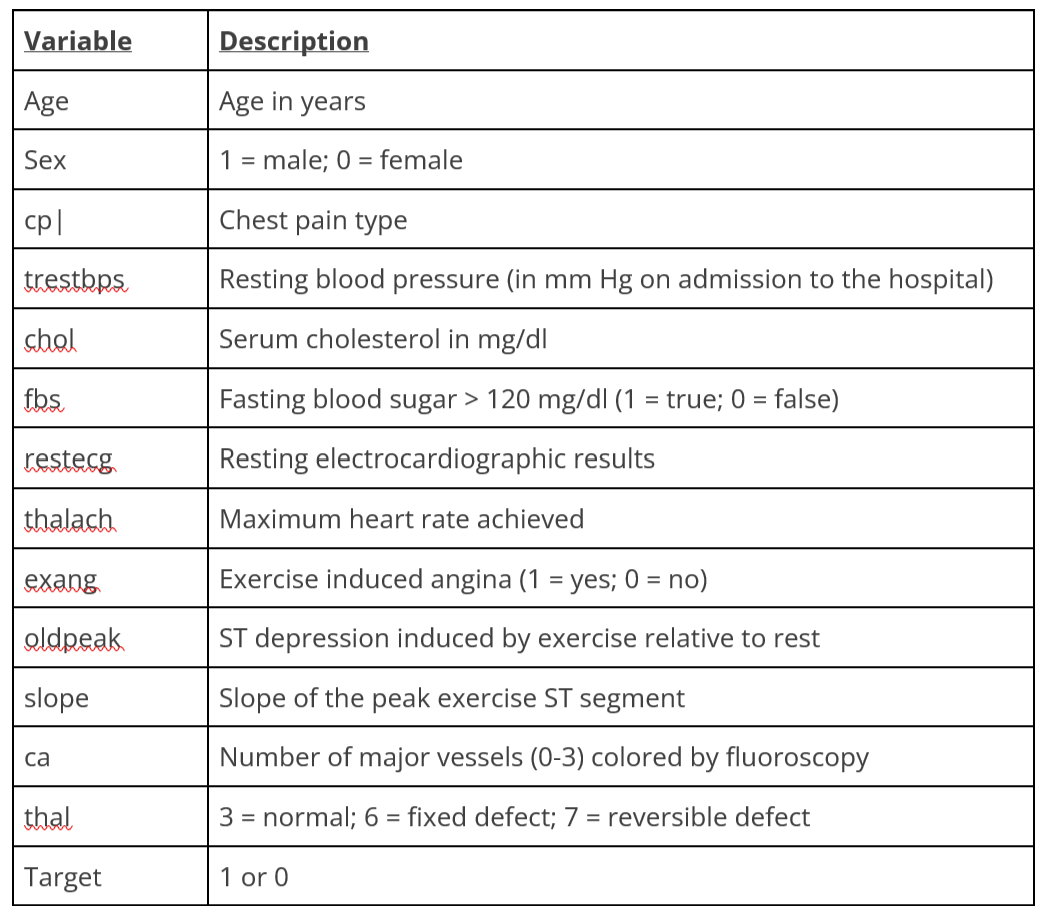

# Import Libraries/modules

In [105]:
import os
import pandas as pd
import numpy as np
import pandas_profiling as pp
import statistics

pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',None)

# For Warnings
import warnings
warnings.simplefilter("ignore")

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, roc_curve,roc_auc_score, plot_roc_curve,ConfusionMatrixDisplay, average_precision_score, roc_curve, precision_score, recall_score, precision_recall_curve

#HyperParameter tuning Learning
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [106]:
# This prints the notebook location
os.getcwd()

'C:\\Users\\shaz5\\Desktop\\Learn\\AI\\Course\\Class 4 Machine Learning\\Projects\\Healthcare Cardiovascular diseases'

In [107]:
# Print all the filen names in the folder
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '1645792364_cep1_machinelearning.docx',
 'cep1_dataset.xlsx',
 'Healthcare_Cardiovascular_diseases_Project.ipynb',
 'Untitled.ipynb',
 '~$45792364_cep1_machinelearning.docx']

# load the dataset in panda dataframe

In [108]:
#import the cep1_dataset dataset xlsx into the panda dataframe#

df = pd.read_excel('cep1_dataset.xlsx')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# Task 1.Preliminary analysis:

### a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [109]:
df.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

##### Structure of the Dataset

In [110]:
df.shape

(303, 14)

##### Datatype of Columns

In [111]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##### check column names

In [112]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### check indexes

In [113]:
df.index

RangeIndex(start=0, stop=303, step=1)

##### Understand data set information

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Identify missing records

In [115]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### Identify duplicate records

In [116]:
df[df.duplicated(keep=False)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   4     2       1  
164      2   4     2       1

##### Look into Sample data

In [117]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

##### Look into Unique records

In [118]:
for i in df.columns:
    print("'{}' column has below unique records\n".format(i))
    print(df[i].sort_values(inplace=False).unique())
    print("\n")

'age' column has below unique records

[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]


'sex' column has below unique records

[0 1]


'cp' column has below unique records

[0 1 2 3]


'trestbps' column has below unique records

[ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200]


'chol' column has below unique records

[126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284

In [119]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [120]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Check Data balance

In [121]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Analysis

* There are total of 14 columns in the dataset
* There are total 303 records in the dataset
* Datatype of all the columns are either int or Float none of the columns are of object type
* There are no null/missing records in dataset hence no missing value treatment is needed
* There is one duplicate record present in the dataset which needs to be removed
* There is no data imbalance in 'target' field between the two binary outputs. We have 165 person with heart disease and 138 person without heart disease, so our problem is balanced.

### b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [122]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True, ignore_index = False)


In [123]:
df.shape

(302, 14)

### Analysis

* There are total 302 records in the dataset after removal of 1 duplicate record
* There are no null/missing records in dataset, hence missing value treatment is not required.

# Task 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

### a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [124]:
df.describe().transpose()

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trestbps  302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalach   302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exang     302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slope     302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
ca        302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thal      302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0
target    302.0    0.543046   0.498970    0.0    0.00    1.0    1.00    1.0

###### Explore the measures of central tendencies 

In [125]:
for i in df.columns:
    print(i)
    print("Mean : ",df[i].mean())
    print("median : ",df[i].median())
    print("mode : ",df[i].mode())
    print("harmonic_mean : ",statistics.harmonic_mean(df[i]))
    print("median_low : ",statistics.median_low(df[i]))
    print("median_high  :  ",statistics.median_high(df[i]))
    print("median_grouped  :  ",statistics.median_grouped(df[i]))  # This is the 50th percentile.
    print("\n")

age
Mean :  54.420529801324506
median :  55.5
mode :  0    58
Name: age, dtype: int64
harmonic_mean :  52.79865724382573
median_low :  55
median_high  :   56
median_grouped  :   55.5


sex
Mean :  0.6821192052980133
median :  1.0
mode :  0    1
Name: sex, dtype: int64
harmonic_mean :  0
median_low :  1
median_high  :   1
median_grouped  :   0.7669902912621359


cp
Mean :  0.9635761589403974
median :  1.0
mode :  0    0
Name: cp, dtype: int64
harmonic_mean :  0
median_low :  1
median_high  :   1
median_grouped  :   0.66


trestbps
Mean :  131.60264900662253
median :  130.0
mode :  0    120
Name: trestbps, dtype: int64
harmonic_mean :  129.39158227824313
median_low :  130
median_high  :   130
median_grouped  :   129.94444444444446


chol
Mean :  246.5
median :  240.5
mode :  0    197
1    204
2    234
Name: chol, dtype: int64
harmonic_mean :  236.5205394621995
median_low :  240
median_high  :   241
median_grouped  :   240.5


fbs
Mean :  0.1490066225165563
median :  0.0
mode :  0    0
Na

###### Explore spread of the data

The spread of the data is a measure that tells us how much variation is there in the data. Dispersion/spread gives us an idea of how the data strays from the typical value.


Standard metrics to quantify the spread are the variance,pvariance,Stdev and pstdev.

In [126]:
for i in df.columns:
    print(i)
    print("variance : ",statistics.variance(df[i]))
    print("pvariance : ",statistics.pvariance(df[i]))
    print("stdev : ",statistics.stdev(df[i]))
    print("pstdev : ",statistics.pstdev(df[i]))
    print("\n")

age
variance :  81.86575652900926
pvariance :  81.59467786500592
stdev :  9.047969746247457
pstdev :  9.032977242582088


sex
variance :  0.21755296913159225
pvariance :  0.2168325950616201
stdev :  0.4664257380672643
pstdev :  0.46565286970190584


cp
variance :  1.065114078898154
pvariance :  1.0615872110872329
stdev :  1.0320436419542314
pstdev :  1.030333543609657


trestbps
variance :  308.4728168797166
pvariance :  307.45138371124074
stdev :  17.56339423003756
pstdev :  17.534291651254144


chol
variance :  2678.423588039867
pvariance :  2669.5546357615895
stdev :  51.75348865574056
pstdev :  51.66773302324759


fbs
variance :  0.12722492354403644
pvariance :  0.1268036489627648
stdev :  0.3566860293648133
pstdev :  0.35609499991261434


restecg
variance :  0.2767045829574707
pvariance :  0.2757883426165519
stdev :  0.5260271694099752
pstdev :  0.5251555413556558


thalach
variance :  524.5715605817254
pvariance :  522.8345686592693
stdev :  22.903527251969845
pstdev :  22.865576

### b.Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [127]:
Categorical_Columns = []
Continious_Columns = []
for column in df.columns:
    if len(df[column].unique()) <= 8:
        Categorical_Columns.append(column)
    else:
        Continious_Columns.append(column)
        
        
        
print("\n Categorical Variables are : " , Categorical_Columns)
print(" \n Continiuous Variables are : " , Continious_Columns)


 Categorical Variables are :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
 
 Continiuous Variables are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [128]:
df1 = df.copy()

In [129]:
def Change_sex(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

def Change_fbs(fbs):
    if fbs == 0:
        return 'false'
    else:
        return 'true'
    
def Change_exang(exang):
    if exang == 0:
        return 'no'
    else:
        return 'yes'

def change_target(target):
    if target == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'


df1['sex'] = df1['sex'].apply(Change_sex)
df1['fbs'] = df1['fbs'].apply(Change_fbs)
df1['exang'] = df1['exang'].apply(Change_exang)
df1['target'] = df1['target'].apply(change_target)

df1.head()

age     sex  cp  trestbps  chol    fbs  restecg  thalach exang  oldpeak  \
0   63    male   3       145   233   true        0      150    no      2.3   
1   37    male   2       130   250  false        1      187    no      3.5   
2   41  female   1       130   204  false        0      172    no      1.4   
3   56    male   1       120   236  false        1      178    no      0.8   
4   57  female   0       120   354  false        1      163   yes      0.6   

   slope  ca  thal         target  
0      0   0     1  Heart Disease  
1      0   0     2  Heart Disease  
2      2   0     2  Heart Disease  
3      2   0     2  Heart Disease  
4      2   0     2  Heart Disease

Assumption :
* We are considering that if target = 0 means there is no heart disease and if target = 1 then there is a heart Disease

Analysis: Variable Types:
    
* Categorical Variables are :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
* Continuous Variables are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### Count Plots

##### Count plot for Categorical Variables

* Lets look into each Categorical_Columns one by one.

sex 

 male      206
female     96
Name: sex, dtype: int64 



 male      68.211921
female    31.788079
Name: sex, dtype: float64 



<Figure size 432x288 with 0 Axes>

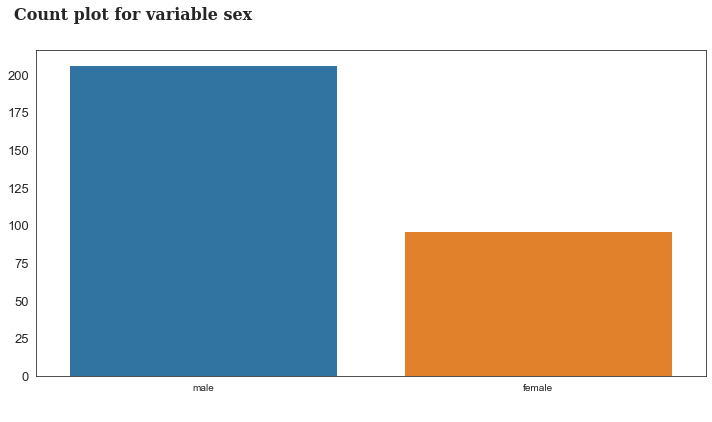

cp 

 0    143
2     86
1     50
3     23
Name: cp, dtype: int64 



 0    47.350993
2    28.476821
1    16.556291
3     7.615894
Name: cp, dtype: float64 



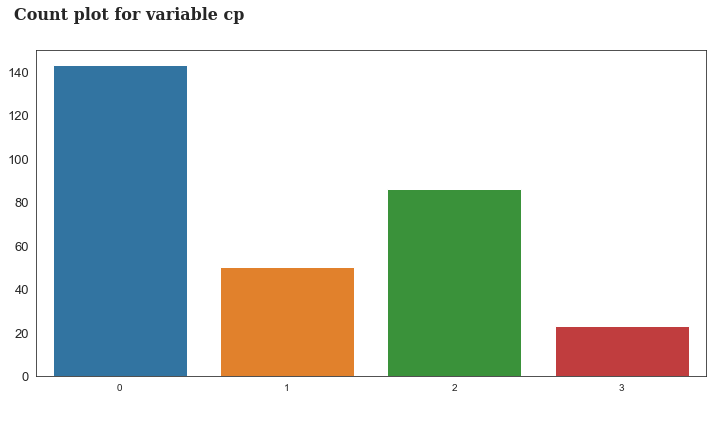

fbs 

 false    257
true      45
Name: fbs, dtype: int64 



 false    85.099338
true     14.900662
Name: fbs, dtype: float64 



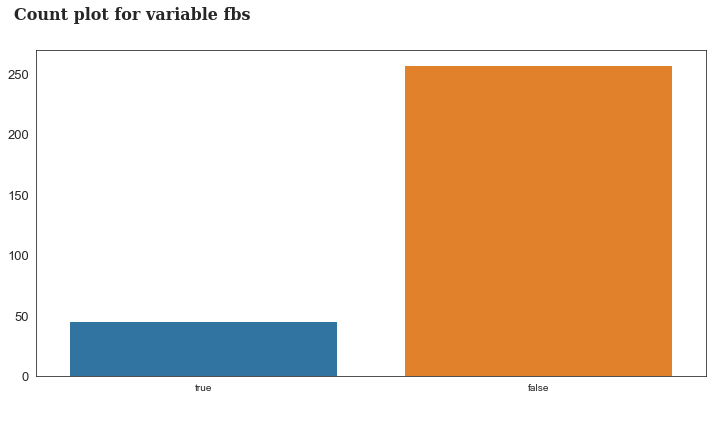

restecg 

 1    151
0    147
2      4
Name: restecg, dtype: int64 



 1    50.000000
0    48.675497
2     1.324503
Name: restecg, dtype: float64 



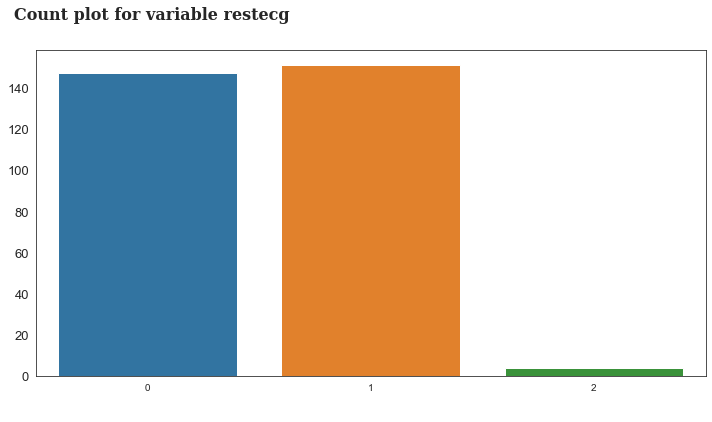

exang 

 no     203
yes     99
Name: exang, dtype: int64 



 no     67.218543
yes    32.781457
Name: exang, dtype: float64 



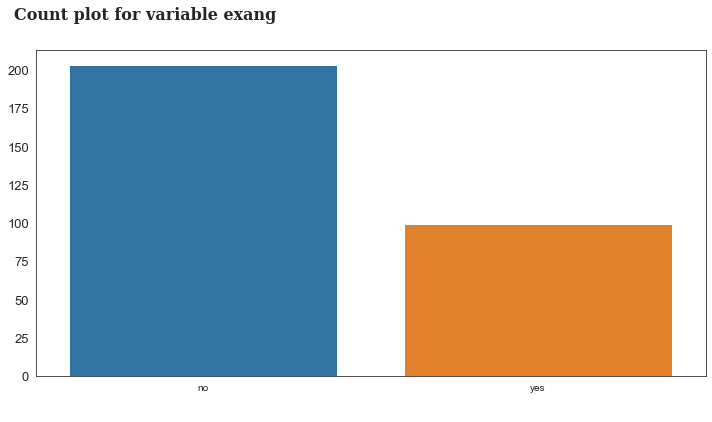

slope 

 2    141
1    140
0     21
Name: slope, dtype: int64 



 2    46.688742
1    46.357616
0     6.953642
Name: slope, dtype: float64 



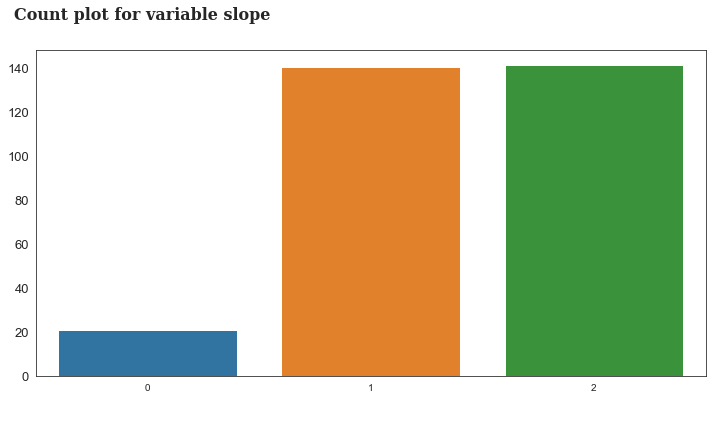

ca 

 0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64 



 0    57.947020
1    21.523179
2    12.582781
3     6.622517
4     1.324503
Name: ca, dtype: float64 



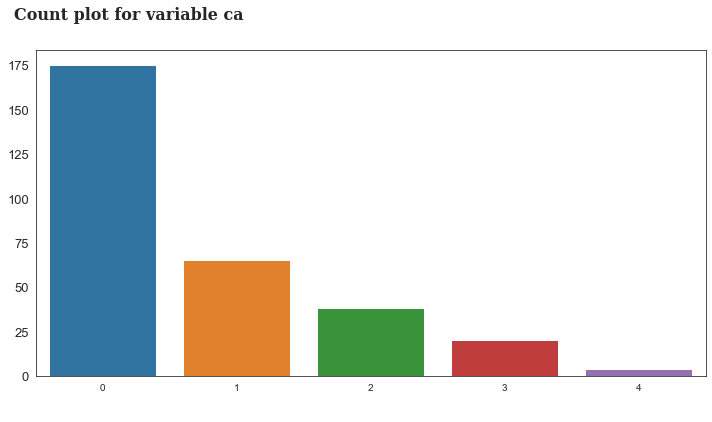

thal 

 2    165
3    117
1     18
0      2
Name: thal, dtype: int64 



 2    54.635762
3    38.741722
1     5.960265
0     0.662252
Name: thal, dtype: float64 



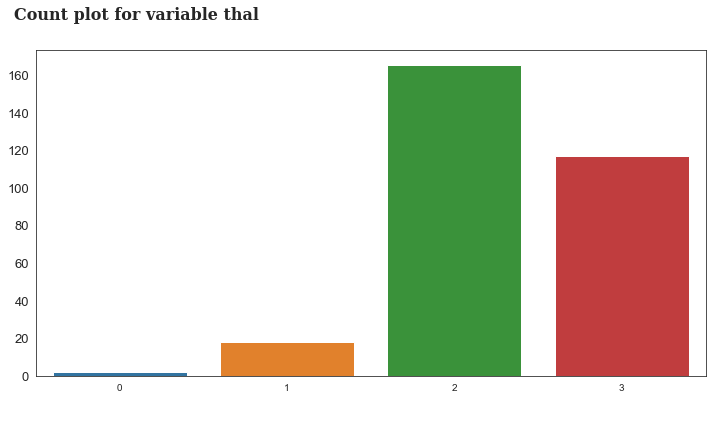

target 

 Heart Disease       164
No Heart Disease    138
Name: target, dtype: int64 



 Heart Disease       54.304636
No Heart Disease    45.695364
Name: target, dtype: float64 



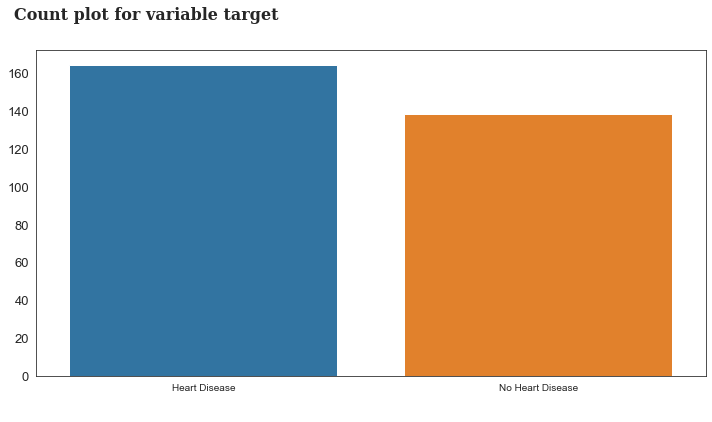

In [130]:
sns.despine(left=True, right=True, bottom=True, top=True)
sns.set_style('white')

for i in Categorical_Columns:
  print(i, "\n\n",df1[i].value_counts(),'\n' )
  print("\n\n",df1[i].value_counts(normalize=True)*100,'\n' )
  fig, ax = plt.subplots(1,1, figsize=(12, 6))
  sns.countplot(data= df1, x=i)
  fig.text(0.1, 0.95, f'Count plot for variable {i}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel(' ', fontsize=20)
  plt.ylabel('')
  plt.yticks(fontsize=13)
  plt.show()

##### Lets look into the Count plot for Categorical Variables with respect to Target

<Figure size 432x288 with 0 Axes>

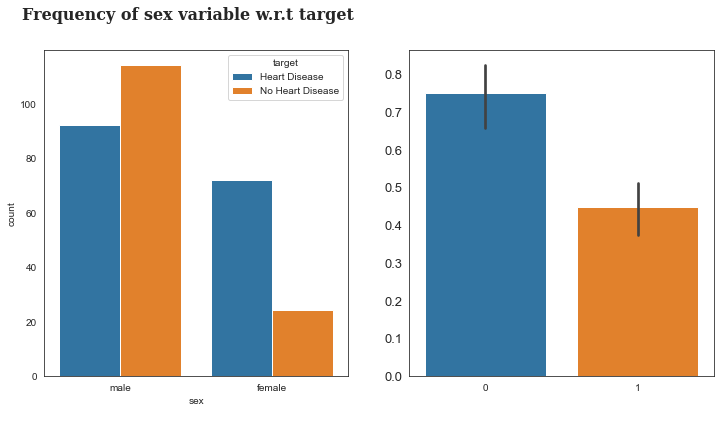

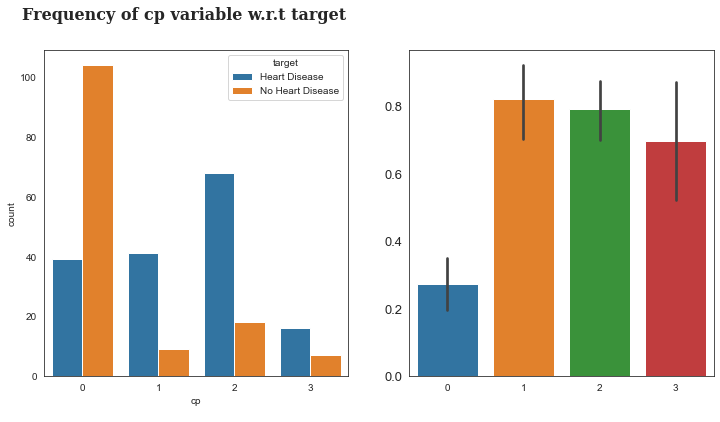

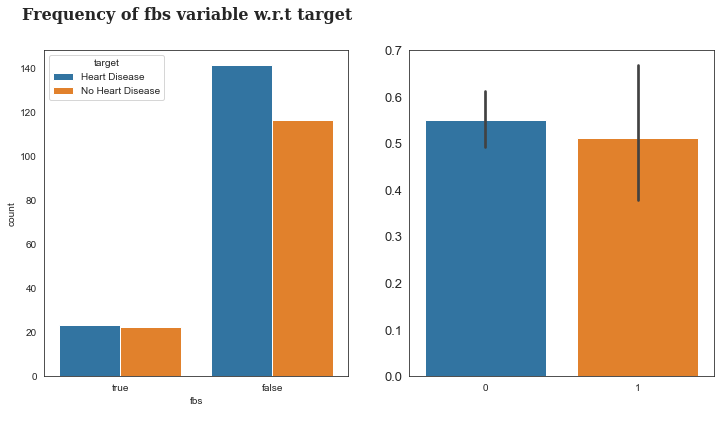

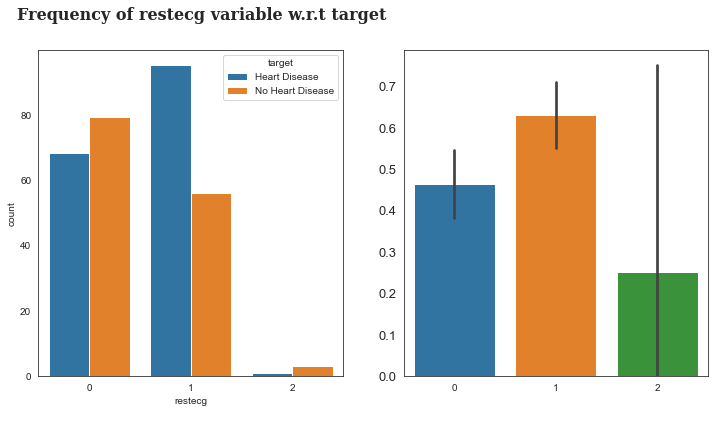

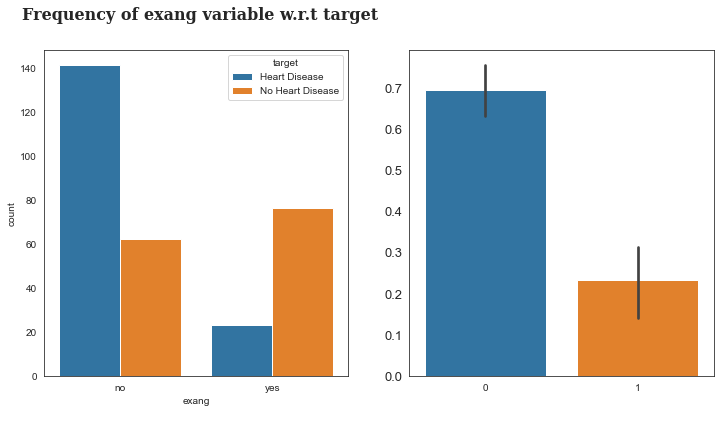

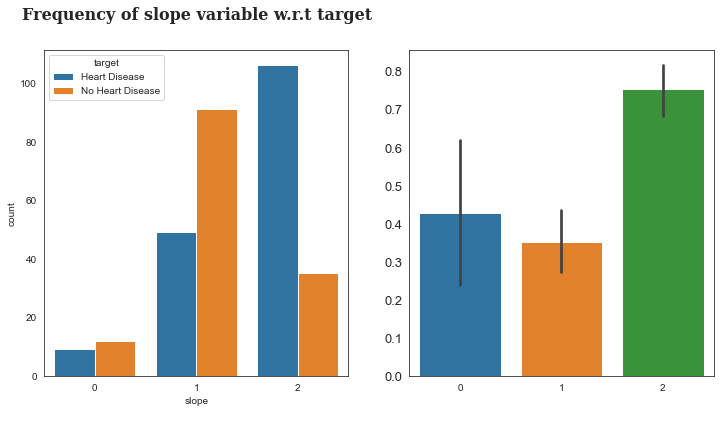

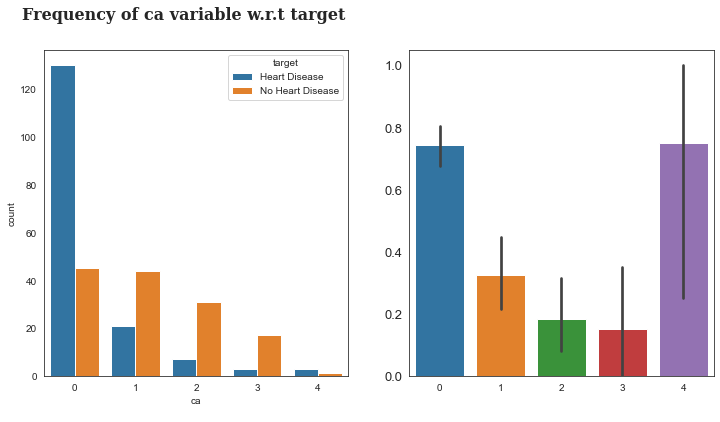

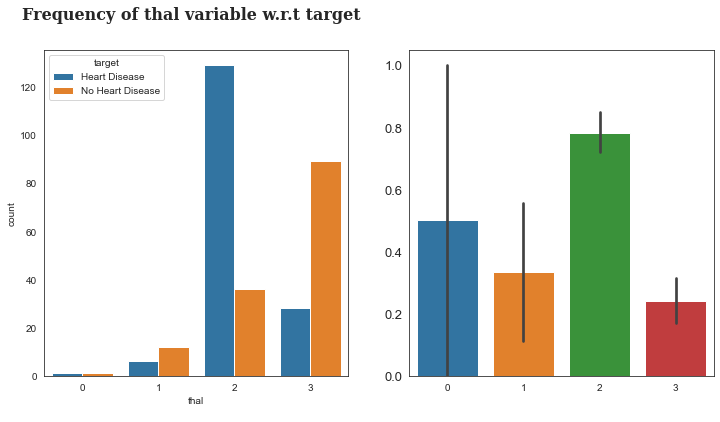

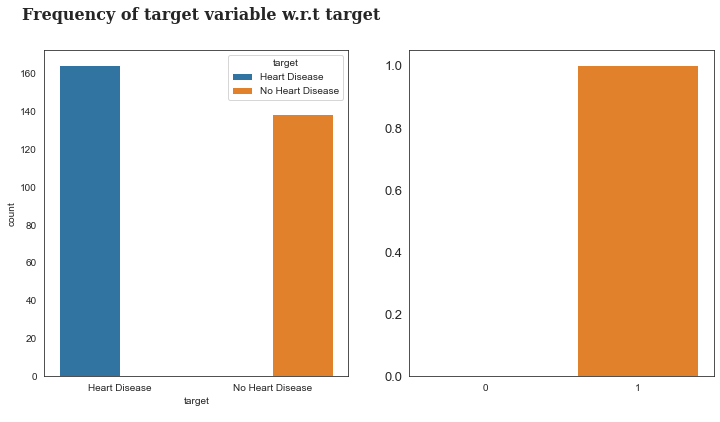

In [131]:
sns.despine(left=True, right=True, bottom=True, top=True)
sns.set_style('white')

for i in Categorical_Columns:
  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  sns.countplot(data= df1, x=i, hue='target', ax=ax[0])
  sns.barplot(data= df, x=i, y='target',  ax=ax[1])  
  fig.text(0.1, 0.95, f'Frequency of {i} variable w.r.t target', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel(' ', fontsize=20)
  plt.ylabel('')
  plt.yticks(fontsize=13)
  plt.show()

###### Univariate Analysis: The above analysis from count plot shows that:

* Sex: 
    * There are approx 68.2% Male patients and approx 31.8% Female patients.
    * Male have more chances of getting heart problems


    
* Chest Pain(Cp) : 

    * Chest pain type 0 is 47%, type 1 is 16%, type 2 is 28%, type 3 is 7% approximately
    * Most of the patients have type Value 1
    * chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems


    
* Fasting Blood sugar(Fbs):

    * Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) is Approx. 85% and and <120mg/dl is 15%
    * Most of the patients’ blood pressure is more than 120.
    * There is not much difference w.r.t target
    
    
* Resting electrocardiographic results(restecg):

    * Type 0 is 49%, Type 1 is 50% and Type 2 is 1% approximately
    * people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'   
    
    
* Exercise induced angina (1 = yes; 0 = no) (exgang):

    * Exercise induced angina is present in 33% population and not present in 67% population
    * People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems
    
* Slope of the peak exercise ST segment (slope):

    * Type 0 , Type 1, Type 2 is present in approx. 7%, 46% and 47%  population respectively
    * Slope '2' causes heart pain much more than Slope '0' and '1'
    
* Ca:

    * Type 0 , Type 1, Type 2, Type 3 , Type 4  is present in approx. 57%, 22%, 13%,7%and 1% population  respectively
    * ca=4 has astonishingly large number of heart patients
   
    
* Thal:

    * Type 0 , Type 1, Type 2, Type 3  is present in approx. 1%, 6%, 55% and 39% population  respectively
    * thal=2 has astonishingly large number of heart patients



#### c. Study the occurrence of CVD across the Age category

<AxesSubplot:xlabel='target', ylabel='age'>

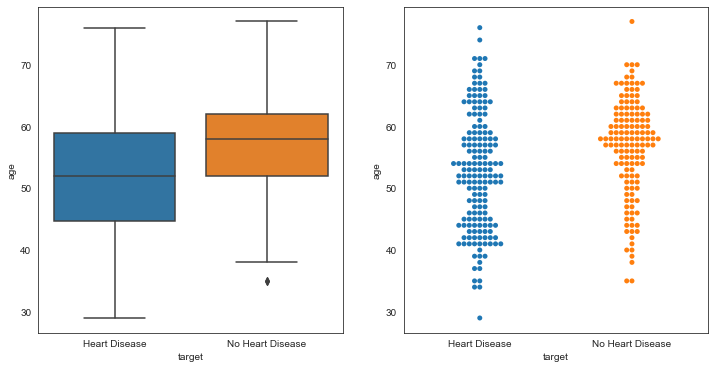

In [132]:
#Boxplot and swarmplot
fig, axes = plt.subplots(1,2, figsize=(12, 6))
sns.boxplot(data=df1, x='target', y='age', ax=axes[0])
sns.swarmplot(data=df1, x='target', y='age', ax=axes[1])


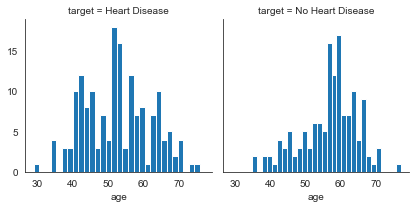

In [133]:
g = sns.FacetGrid(df1, col='target')
g.map(plt.hist, 'age', bins=30)

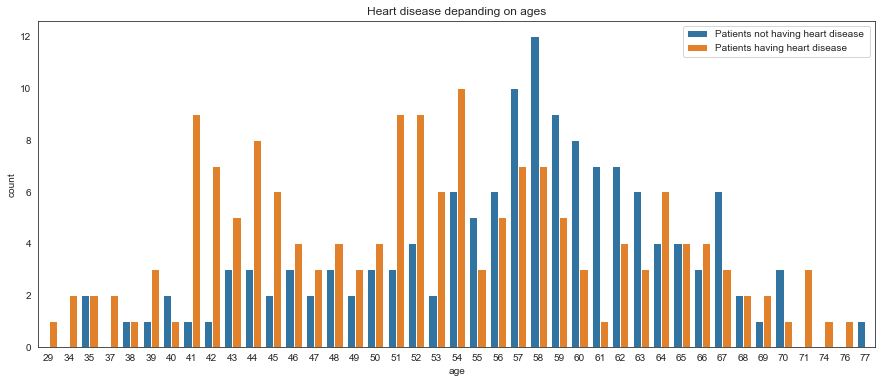

In [134]:
# To study the occurrence of CVD across different ages.

plt.figure(figsize=(15,6))
sns.countplot(x = 'age', hue = 'target', data = df)
plt.title("Heart disease depanding on ages")
plt.legend(["Patients not having heart disease ","Patients having heart disease "], loc= "upper right")

Text(0.5, 1.0, 'Distribution of age accordin to target variable \n')

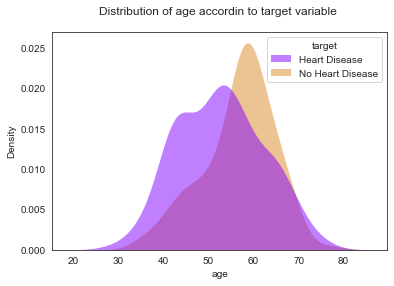

In [135]:
sns.kdeplot(data=df1, x=df1.age,hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
plt.title('Distribution of age accordin to target variable \n')

Text(0.5, 1.0, 'Distribution of age \n')

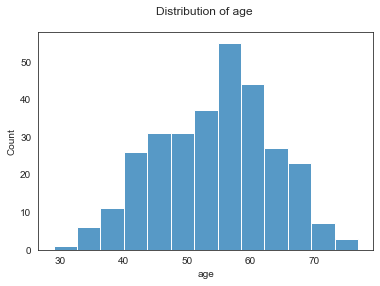

In [136]:
sns.histplot(data=df1, x=df1.age)
plt.title('Distribution of age \n')

In [137]:
df.groupby([pd.cut(df['age'],4)])['target'].agg(['count','mean'])

count      mean
age                            
(28.952, 41.0]     28  0.750000
(41.0, 53.0]       99  0.686869
(53.0, 65.0]      142  0.408451
(65.0, 77.0]       33  0.515152

#### Analysis

* Most of the patients have age (53–65)
* Most of the distribution of the CVD are between 40 to 65 age gap
* CVD is peak between age 55 and 60
* less heart disease occurring below age 30 and above age 70
* Occurence of CVD is highest in particular age groups, the data shows that a higher number of patients within the same age do not suffer any coronary artery disease.

#### d. Study the composition of all patients with respect to the Sex category

In [138]:
df1.groupby(['sex','target'])['target'].agg('count')

sex     target          
female  Heart Disease        72
        No Heart Disease     24
male    Heart Disease        92
        No Heart Disease    114
Name: target, dtype: int64

In [139]:
df.groupby([pd.cut(df['sex'],2)])['target'].mean()

sex
(-0.001, 0.5]    0.750000
(0.5, 1.0]       0.446602
Name: target, dtype: float64

In [140]:
display(
    df1['sex'].value_counts(),
    df1['sex'].value_counts(normalize=True)*100
)

male      206
female     96
Name: sex, dtype: int64

male      68.211921
female    31.788079
Name: sex, dtype: float64

Text(0.5, 1.0, 'Gender v/s target\n')

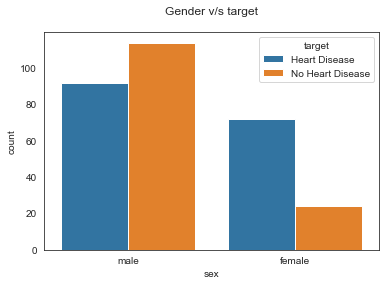

In [141]:
sns.countplot(data= df1, x='sex',hue='target')
plt.title('Gender v/s target\n')

##### Analysis

* There are more no of male patients than female patients
* Heart attack rate is more in men than women.

###### End to End Analysis of Continious features

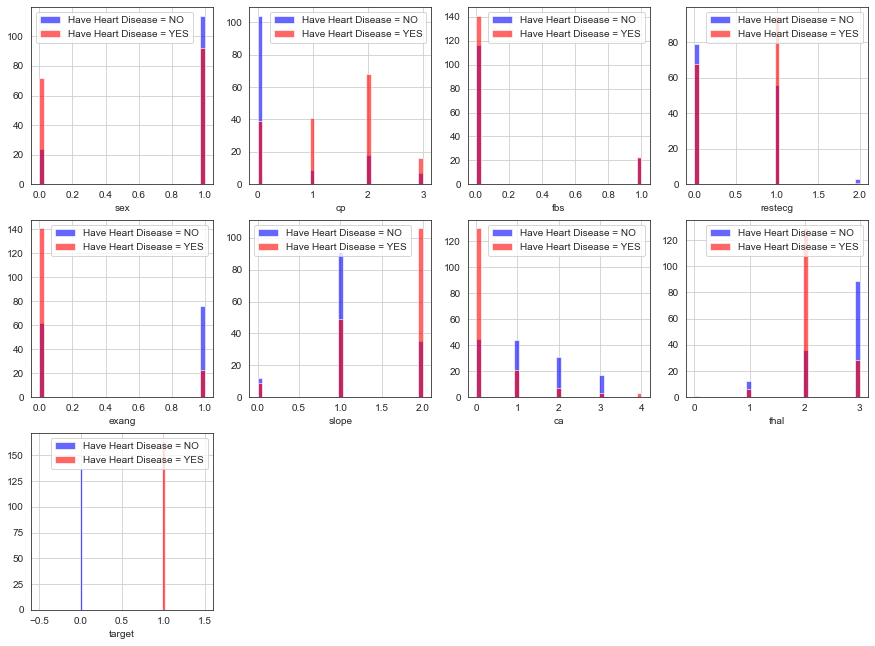

In [142]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(Categorical_Columns, 1):
    plt.subplot(4, 4, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

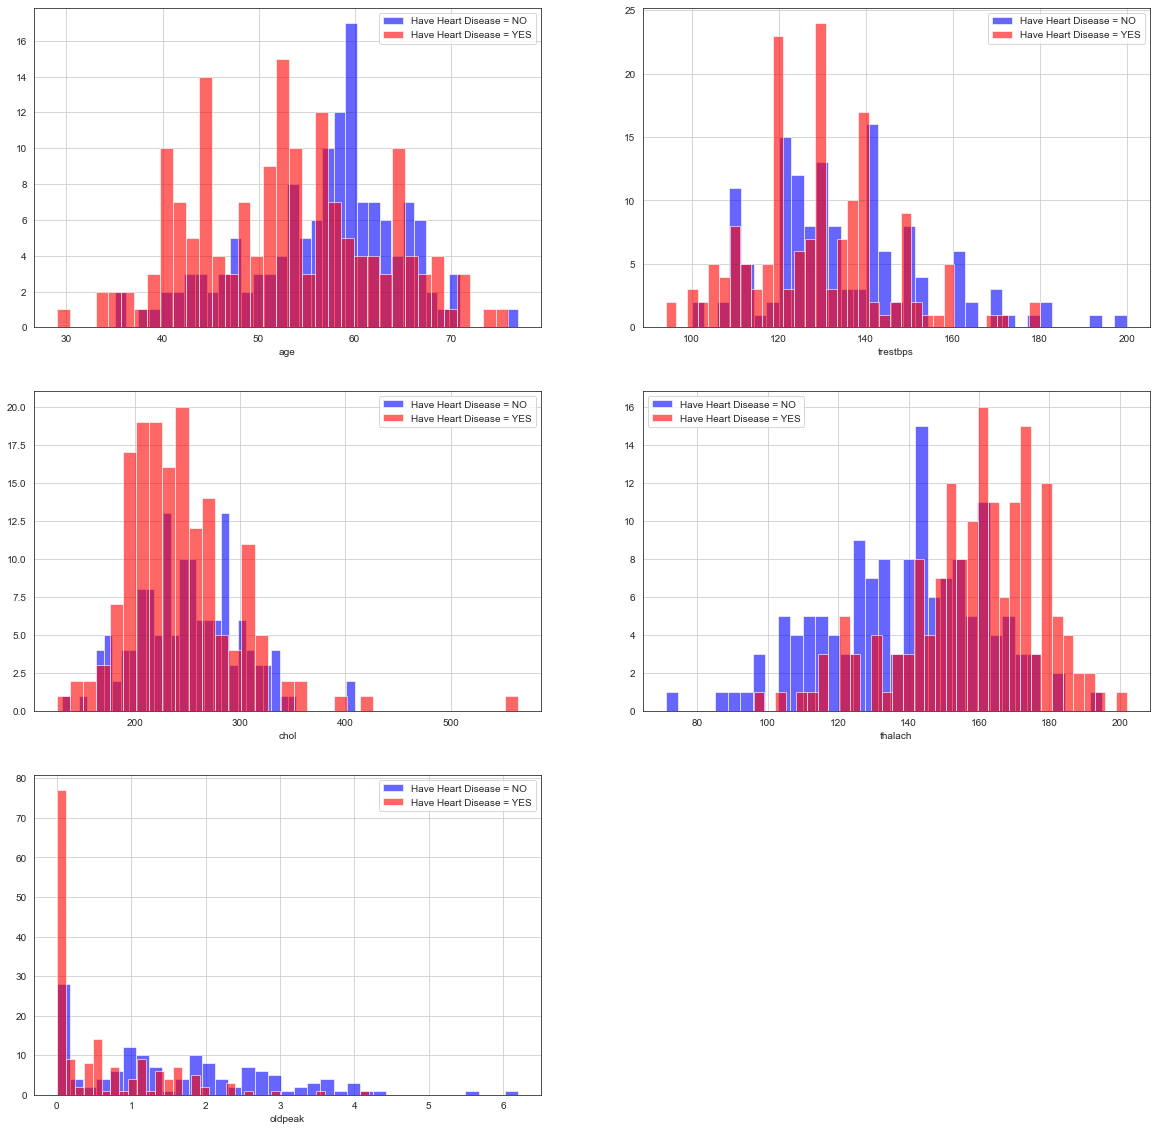

In [143]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(Continious_Columns, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [144]:
Continious_Columns

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [145]:
df["trestbps"].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [146]:
df.groupby([pd.cut(df['trestbps'],5)])['target'].mean()

trestbps
(93.894, 115.2]    0.615385
(115.2, 136.4]     0.560284
(136.4, 157.6]     0.530120
(157.6, 178.8]     0.380952
(178.8, 200.0]     0.200000
Name: target, dtype: float64

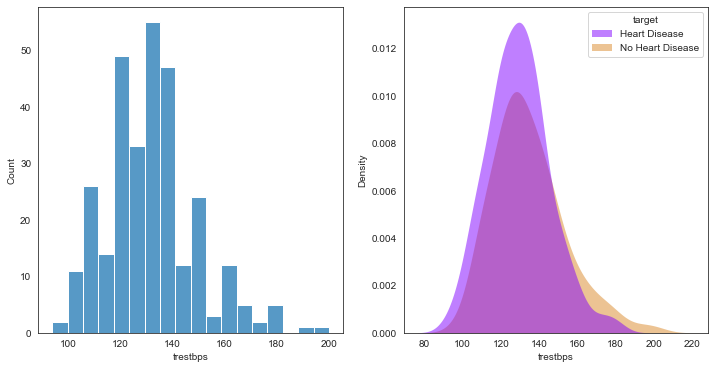

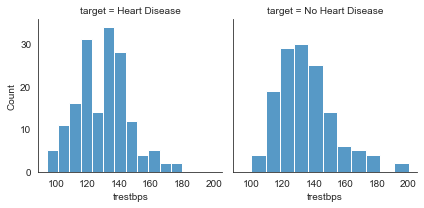

In [147]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

sns.histplot(df["trestbps"], ax=axes[0])
sns.kdeplot(ax=axes[1], data=df1, x =df.trestbps,hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)


g = sns.FacetGrid(data=df1, col='target', col_wrap=2)
#add histograms to each plot
g.map(sns.histplot, 'trestbps')


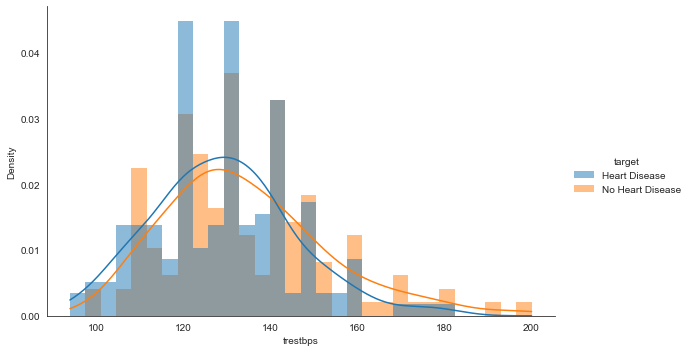

In [148]:
sns.displot(
    df1, x='trestbps', hue='target',
    bins=30, linewidth=0, kde=True,
    stat="density", common_norm=False,
    height=5, aspect=1.6
)


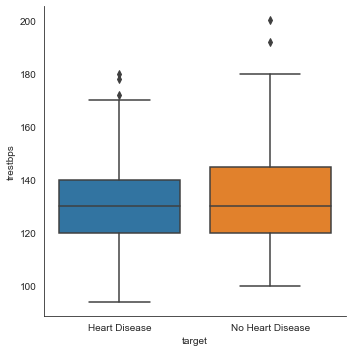

In [149]:
sns.catplot(x='target',y='trestbps',kind='box',data=df1)
plt.show()

#### Analysis

* There are some anomalies in the data after 170 to 190 trestbps and 190 to 205.
* it can be assumed, if the resting blood pressure value is more than 190 , there is less chance of cardiovascular disease.
* Still there are people with 170-180 trestbps range with CVD disease. 
* Higher resting blood pressure is shown to have a high correlation with incidence of coronary artery disease.
* resting blood pressure anything above 120-140 is typically cause for concern.

#### f. Describe the relationship between cholesterol levels and a target variable

In [150]:
df["chol"].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

In [151]:
df[['chol','target']].corr()

chol    target
chol    1.000000 -0.081437
target -0.081437  1.000000

In [152]:
df.groupby([pd.cut(df["chol"],5)])['target'].mean()

chol
(125.562, 213.6]    0.607143
(213.6, 301.2]      0.514286
(301.2, 388.8]      0.526316
(388.8, 476.4]      0.500000
(476.4, 564.0]      1.000000
Name: target, dtype: float64

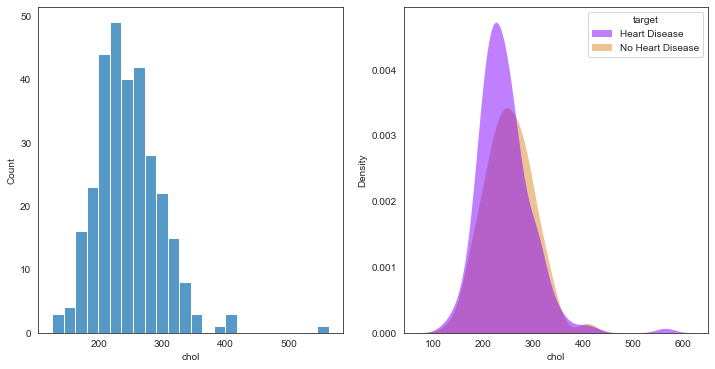

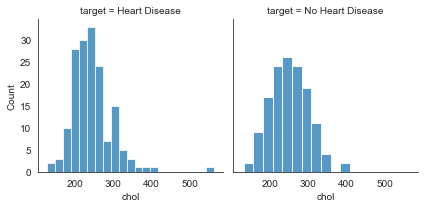

In [153]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

sns.histplot(df["chol"], ax=axes[0])
sns.kdeplot(ax=axes[1], data=df1, x =df.chol,hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)


g = sns.FacetGrid(data=df1, col='target', col_wrap=2)
#add histograms to each plot
g.map(sns.histplot, 'chol')


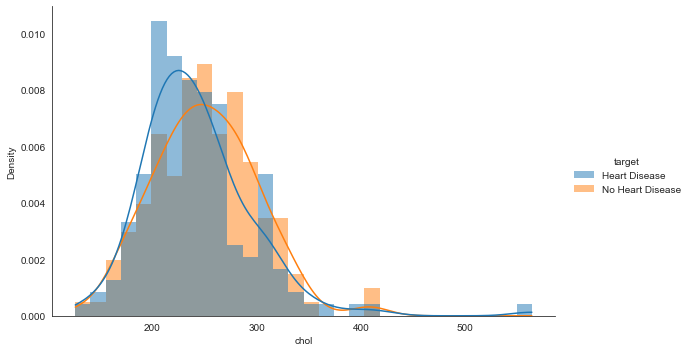

In [154]:
sns.displot(
    df1, x='chol', hue='target',
    bins=30, linewidth=0, kde=True,
    stat="density", common_norm=False,
    height=5, aspect=1.6
)

<AxesSubplot:xlabel='target', ylabel='chol'>

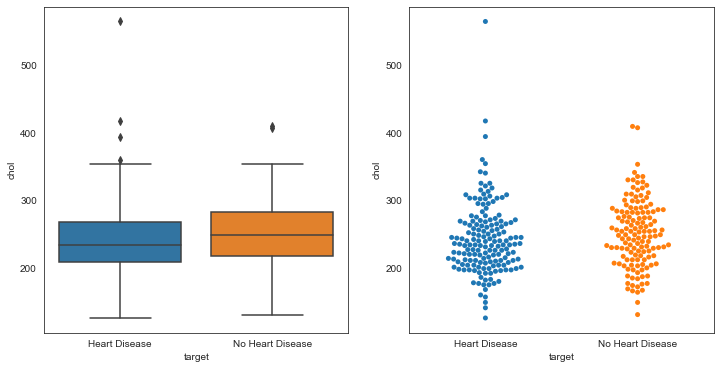

In [155]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

sns.boxplot(x='target',y='chol',ax=axes[0],data=df1)
sns.swarmplot(x='target',y='chol',ax=axes[1],data=df1)

##### Analysis

* Higher resting blood pressure is shown to have a high correlation with incidence of coronary artery disease.
* High serum cholesterol (200–300) is very strongly associated with incidence of coronary artery disease. Most of the patients’ serum cholesterol level lies between the range (200–250).

### g. State what relationship exists between peak exercising and the occurrence of a heart attack

In [156]:
df[['oldpeak','target']].corr()

oldpeak    target
oldpeak  1.000000 -0.429146
target  -0.429146  1.000000

In [157]:
df.groupby([pd.cut(df['oldpeak'],5)])['target'].mean()

oldpeak
(-0.0062, 1.24]    0.666667
(1.24, 2.48]       0.437500
(2.48, 3.72]       0.096774
(3.72, 4.96]       0.142857
(4.96, 6.2]        0.000000
Name: target, dtype: float64

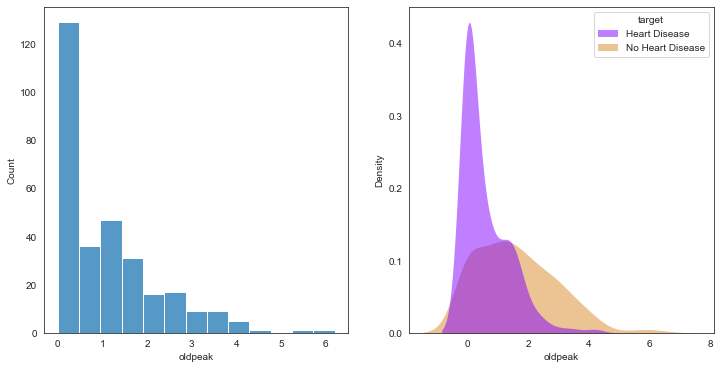

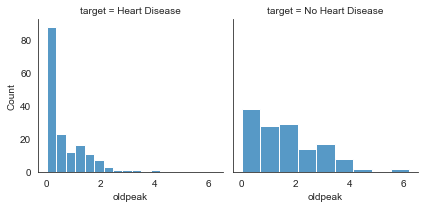

In [158]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

sns.histplot(df["oldpeak"], ax=axes[0])
sns.kdeplot(ax=axes[1], data=df1, x =df.oldpeak,hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)


g = sns.FacetGrid(data=df1, col='target', col_wrap=2)
#add histograms to each plot
g.map(sns.histplot, 'oldpeak')



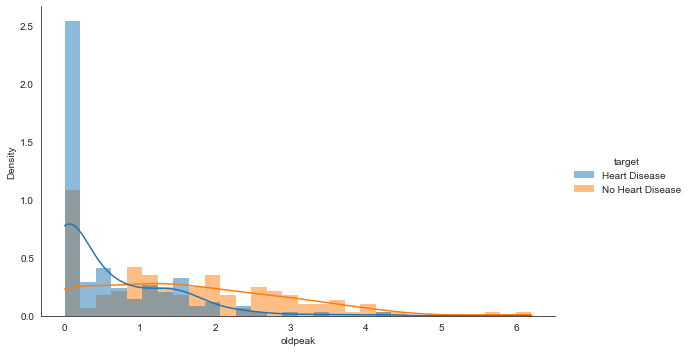

In [159]:
sns.displot(
    df1, x='oldpeak', hue='target',
    bins=30, linewidth=0, kde=True,
    stat="density", common_norm=False,
    height=5, aspect=1.6
)


<AxesSubplot:xlabel='target', ylabel='oldpeak'>

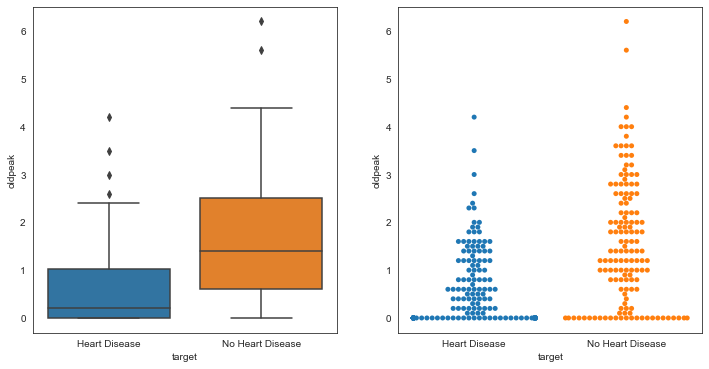

In [160]:

fig, axes = plt.subplots(1,2, figsize=(12, 6))

sns.boxplot(x='target',y='oldpeak',ax=axes[0],data=df1)
sns.swarmplot(x='target',y='oldpeak',ax=axes[1],data=df1)



Text(0, 0.5, 'ST depression induced by exercise relative to rest Genderwise')

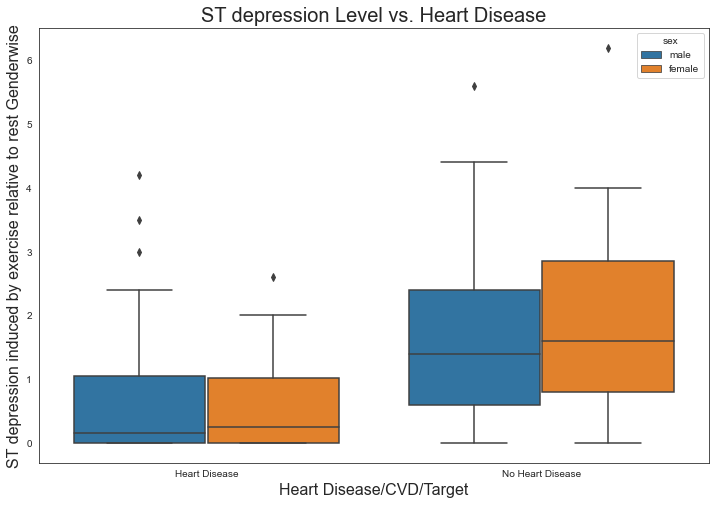

In [161]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'oldpeak',hue="sex", data=df1 )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease/CVD/Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest Genderwise", fontsize=16)

Text(24.98000000000001, 0.5, 'ST depression')

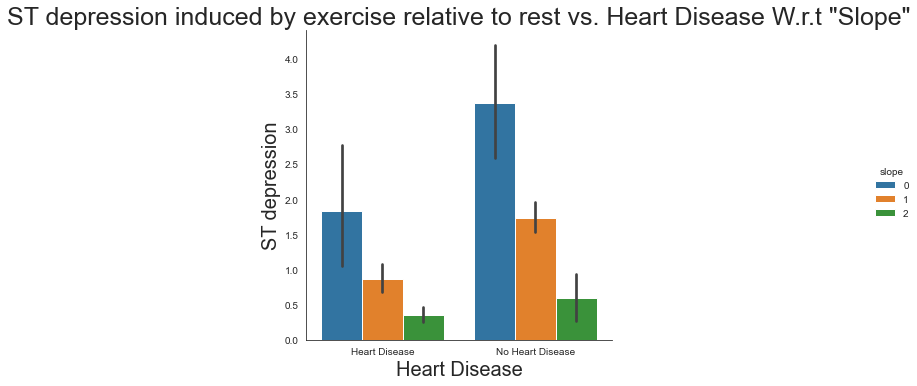

In [162]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df1);

plt.title('ST depression induced by exercise relative to rest vs. Heart Disease W.r.t "Slope"',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

#### Analysis

* There is a high negative corelation existing between old peak and target columns. Resting ST-segment depression is a risk marker of adverse cardiac prognosis. ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. 

* The “slope” hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

* There are some outliers in data

* Negetaive CVD patients exhibit a heightened median for ST depression level, while Positive patients have lower levels. In addition, we don’t see many differences between male & female target outcomes, expect for the fact that female have slightly larger ranges of ST Depression.

* Oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

### h. Check if thalassemia is a major cause of CVD

In [163]:
df[['target','thal']].corr()

target      thal
target  1.000000 -0.343101
thal   -0.343101  1.000000

In [164]:
df.groupby([pd.cut(df['thal'],5)])['target'].mean()

thal
(-0.003, 0.6]    0.500000
(0.6, 1.2]       0.333333
(1.2, 1.8]            NaN
(1.8, 2.4]       0.781818
(2.4, 3.0]       0.239316
Name: target, dtype: float64

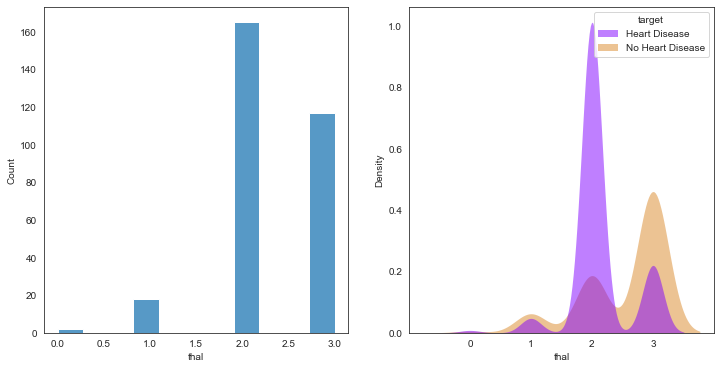

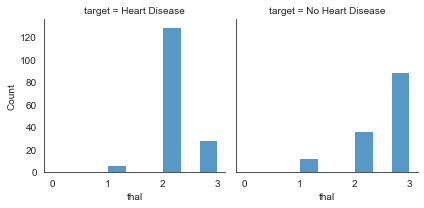

In [165]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

sns.histplot(df["thal"], ax=axes[0])
sns.kdeplot(ax=axes[1], data=df1, x =df.thal,hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)


g = sns.FacetGrid(data=df1, col='target', col_wrap=2)
#add histograms to each plot
g.map(sns.histplot, 'thal')


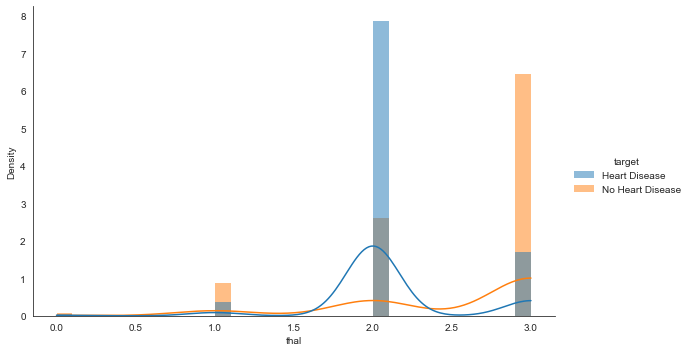

In [166]:
sns.displot(
    df1, x='thal', hue='target',
    bins=30, linewidth=0, kde=True,
    stat="density", common_norm=False,
    height=5, aspect=1.6
)



In [167]:
a = pd.crosstab(df['thal'],df['target'])
a

target   0    1
thal           
0        1    1
1       12    6
2       36  129
3       89   28

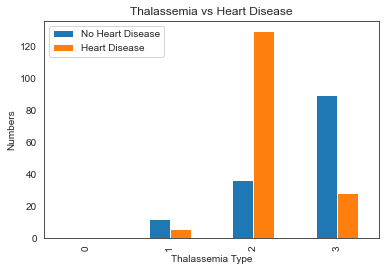

In [168]:
a.plot(kind ='bar')
plt.title('Thalassemia vs Heart Disease')
plt.xlabel('Thalassemia Type')
plt.ylabel('Numbers')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

#### Analysis

* There is a high negative corelation existing between thal(Thalassemia) and the occurrence of a heart attack
* People with Thalassemia Type = 2 is having more chances of Heart Disease


### i. List how the other factors determine the occurrence of CVD

##### Using Pearson Coff

<AxesSubplot:>

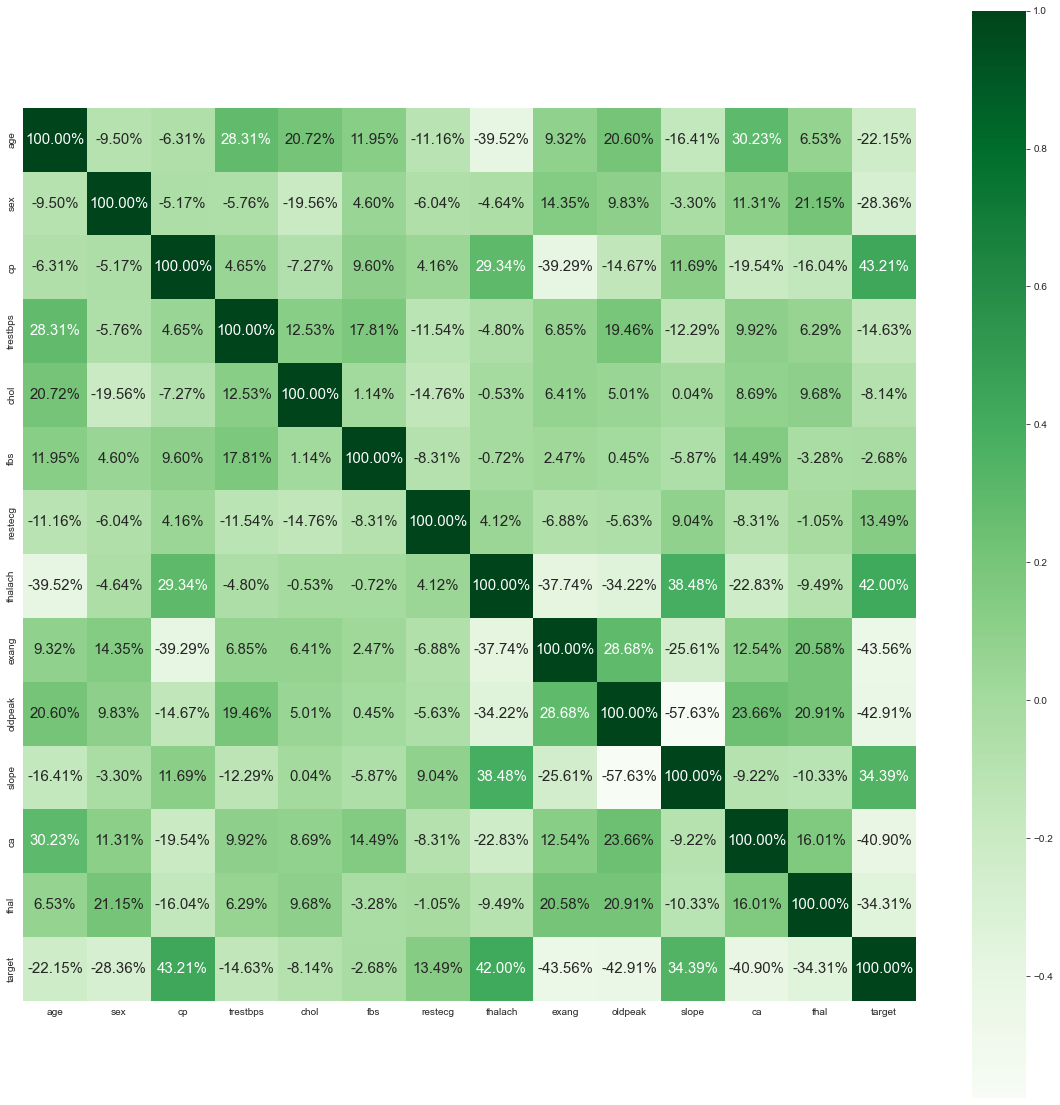

In [169]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt = '.2%' , annot=True, annot_kws={'size':15}, cmap='Greens')

In [170]:
#print the column names which have threshold ≥ 0.3 or ≤ -0.3 with 'target':

var= corr['target'][((corr['target'] >=0.3) | (corr['target'] <= -0.3)) & (corr['target'] != 1)].index.tolist()
var

['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

<AxesSubplot:>

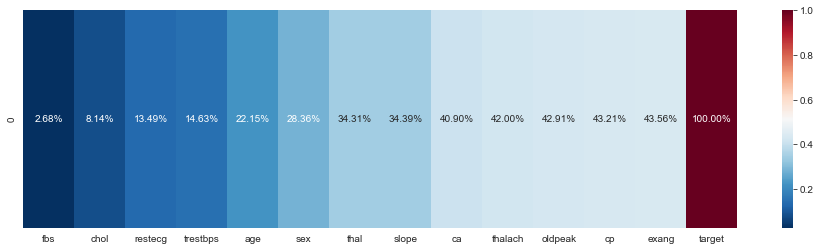

In [171]:
# Visualizing correlation of features with prediction column `target`

corr_with_target = df.corrwith(df['target'])

plt.figure(figsize = (16, 4))
sns.heatmap([np.abs(corr_with_target).sort_values()], cmap = 'RdBu_r', annot = True, fmt = '.2%',xticklabels= np.abs(corr_with_target).sort_values().index)

In [172]:
# Feature Importances by Correlation Matrix

corr_with_target[:-1].abs().sort_values(ascending = False)

exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
dtype: float64

##### Using ExtraTreesClassifier

In [173]:
from sklearn.ensemble import ExtraTreesClassifier


# To know the feature Importances using ExtraTreesClassifier
y = df['target'].values
extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion = 'entropy', random_state=42)
extra_tree_forest.fit(df.iloc[:, :-1].values, df['target'])

print("Percentage Importance of each features with respect to Target : ")
important_features = pd.Series(extra_tree_forest.feature_importances_*100, index = df.columns[:-1])
important_features.sort_values(ascending = False)

Percentage Importance of each features with respect to Target : 


oldpeak     12.860611
ca          11.499608
exang       10.730463
age          9.986715
thalach      9.241941
thal         8.288959
cp           8.250057
chol         6.591516
slope        5.886851
trestbps     5.831797
sex          4.710882
restecg      4.163261
fbs          1.957339
dtype: float64

### Analysis

###### The above two methods 1.Pearson Coff and 2. ExtraTreesClassifier :
    
    
* 'fbs' (fasting blood sugar) have very less inverse correlation with Target variable and 'fbs' seems least important feature.
* Cholestrol levels and target variable have a small inverse correlation.

###### The features cp, thalach, exang, oldpeak and ca have strong correlation with the target value.


* exang (Exercise induced angina) and oldpeak (ST depression induced by exercise relative to rest) have strong inverse corelation wit target. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.

* cp (Chest pain type) is positively co-related to  target (predictor) , chest pain is major symptoms of heart attack. the greater amount of chest pain results in a greater chance of having heart disease

* thalach (Maximum heart rate achieved) is also a major sympton of heart attack

* thalassemia is highly correlated with Heart diseases.



### j. Use a pair plot to understand the relationship between all the given variables

##### It make sence to use plot only for continuous columns from data, because with so many features, it can be difficult to see each one. So only continuous features are used for pairplot

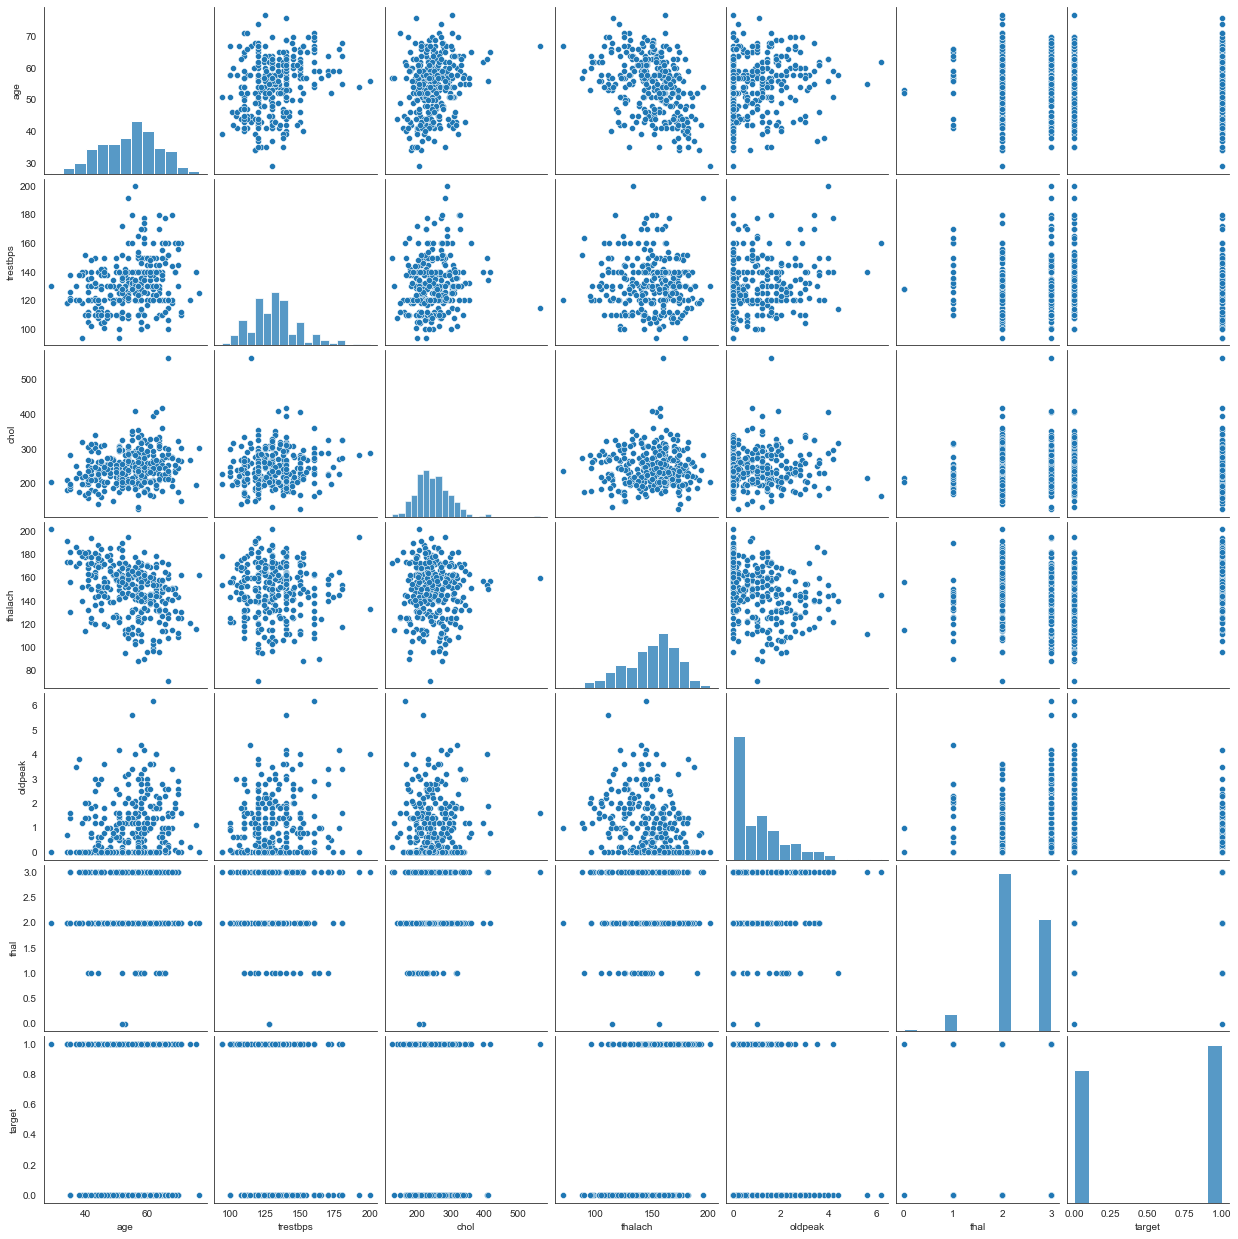

In [174]:
# Pairplotfor continious features and Target

sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','thal','target']])

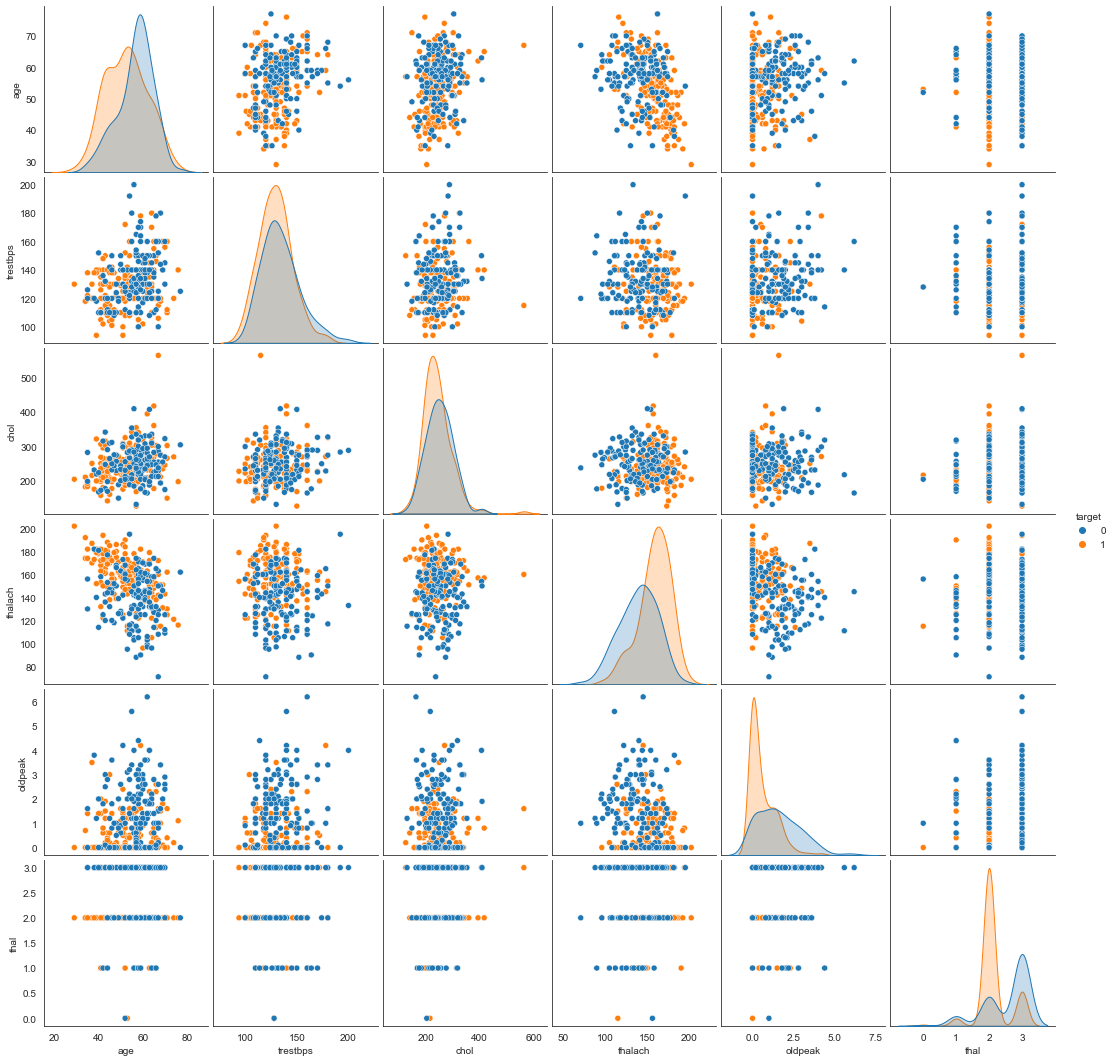

In [175]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','thal','target']],hue='target')

# 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

## Prepare Data for Moeling

#### Assign

In [176]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [178]:
print("X_train : {} \n X_test : {} \n y_train : {} \n y_test : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train : (241, 13) 
 X_test : (61, 13) 
 y_train : (241,) 
 y_test : (61,)


#### Normaliz

In [179]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Data Modelling

Implement 2 models on dataset:

* Logistic Regression
* Random forest

We will also use State models of Logistic Regression for feature selection

We will be using three search algorithms for each :

* GridSearchCV
* RandomSearchCV

## Base Model

### 1. Logistic Regression

Accuracy of Logistic Regression: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



confussion matrix
[[21  8]
 [ 4 28]]


<AxesSubplot:>

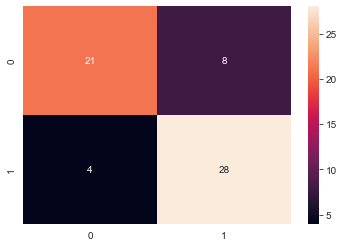

In [180]:
model1 = 'Logistic Regression'
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_y_predict)
lr_acc_score = accuracy_score(y_test, lr_y_predict)

print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_y_predict))
print("\n")
print("confussion matrix")
print(lr_conf_matrix)
sns.heatmap(lr_conf_matrix,annot=True)



In [181]:
actual = []
predcition = []

for i,j in zip(y_test,lr_y_predict):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [182]:
result  = pd.DataFrame(dic)
result

Actual  Prediction
0        0           0
1        1           1
2        1           0
3        0           0
4        1           1
..     ...         ...
56       0           1
57       1           1
58       0           0
59       0           0
60       0           0

[61 rows x 2 columns]

###### ROC Curve

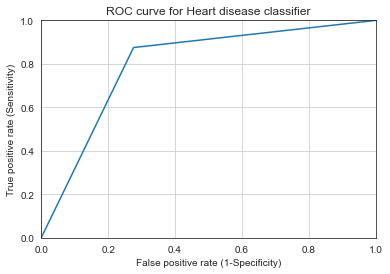

In [183]:
fpr, tpr, thresholds = roc_curve(y_test, lr_y_predict)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [184]:
roc_auc_score(y_test,lr_y_predict)

0.7995689655172414

### 2. Random Forest Classfier

Accuracy of Random Forest Classfier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.78      0.91      0.84        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



confussion matrix
[[21  8]
 [ 3 29]]


<AxesSubplot:>

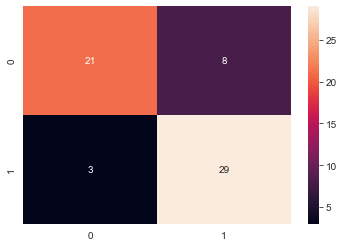

In [185]:
model2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
model_rf = rf.fit(X_train,y_train)
rf_y_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_y_predicted)
rf_acc_score = accuracy_score(y_test, rf_y_predicted)

print("Accuracy of Random Forest Classfier:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_y_predicted))
print("\n")
print("confussion matrix")
print(rf_conf_matrix)
sns.heatmap(rf_conf_matrix,annot=True)



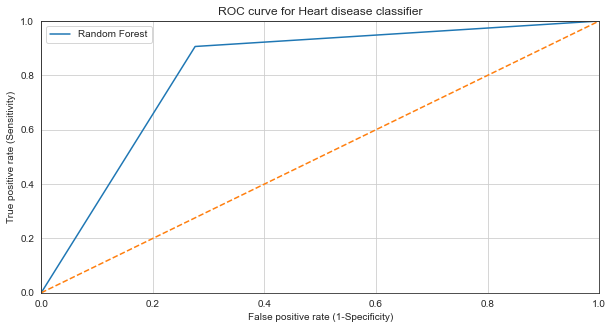

In [186]:
plt.figure(figsize=(10,5))
plt.title('ROC curve for Heart disease classifier')
sns.set_style('whitegrid')
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test, rf_y_predicted)
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.grid(True)
plt.legend()
plt.show()


#### Model Evaluation

In [187]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest'], 'Accuracy': [lr_acc_score*100, rf_acc_score*100]})
model_ev

Model   Accuracy
0  Logistic Regression  80.327869
1        Random Forest  81.967213

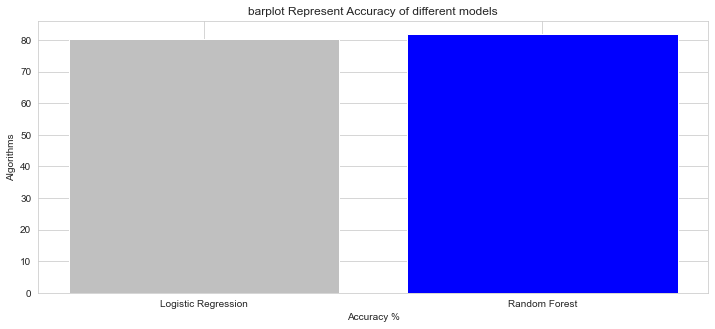

In [188]:
colors = ['silver','blue']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()


## leveraging standard error and p-values from statsmodels for Feature Selection and re-build the Random Forest Model and Logistic Regression Model

In [189]:
Xtrain = df.drop('target', axis=1)
ytrain = df['target']

In [190]:
log_reg = sm.Logit(ytrain,Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.351033
         Iterations 7


In [191]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           12
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.4908
Time:                        23:20:09   Log-Likelihood:                -106.01
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 4.033e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0156      0.019      0.811      0.417      -0.022       0.053
sex           -1.6352      0.451     -3.622      0.000      -2.520      -0.750
cp             0.8357      0.184      4.535      0.0

######  Explanation of some of the terms in the summary table:

* std dev : Features age, trestbps, chol and thalach have low standard deviation of coefficient which is not looking too good.


* coef : the coefficients of the independent variables in the equation. Features sex, cp, exang, ca and thal have high coefficient values, it is the measurement of how change in that variable affects the independent variable. Features trestbps, age, chol, fbs and thalach are having low coefficient values, we may have to remove some of them taking into account the result of correlation analysis, standard error and p value. 


* Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model. We see that we get a Pseudo R-squared of 0.49 which means the model explains 49% of the target variable.
    
###### Six Features are greater than the conventional limit of 0.05 for p-values. 
###### We will eliminate the feature chol, fbs,age,restecg on basis of correlation analysis, coefficient value and p-value. We can also eliminate other features but for now we use them and not deleting other features to void underfitting.

#### REDEFINE Features

In [192]:
# Define Feature and labels:

X_train_fs = df.drop(['chol','fbs','age','restecg','target'], axis=1)
y_train_fs = df['target']
X_train_fs.head()


sex  cp  trestbps  thalach  exang  oldpeak  slope  ca  thal
0    1   3       145      150      0      2.3      0   0     1
1    1   2       130      187      0      3.5      0   0     2
2    0   1       130      172      0      1.4      2   0     2
3    1   1       120      178      0      0.8      2   0     2
4    0   0       120      163      1      0.6      2   0     2

### Train Test Split

In [193]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X_train_fs,y_train_fs,test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 9)
(61, 9)
(241,)
(61,)


### Normaliz

In [194]:
#Normaliz

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Parameter Grid

In [195]:
# use this structure if you want to try multiple algoriths (with hyper parameter tuning) over data

model_params = {
    
   'random-forest' : {
       
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [50, 100, 200, 300, 500], 
             "max_depth": [3, 5, 7, 9, 11, 13],
            # "min_samples_split" : np.arange(2,20,2),
            # "min_samples_leaf" : np.arange(1,20,2)
            
         }
    },
    'Logistic Regression' :{
        'model' :  LogisticRegression(),
        'params' : {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000],'solver':['liblinear'],
                   }
    }
    
}

In [196]:
model_params.items()

dict_items([('random-forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]}}), ('Logistic Regression', {'model': LogisticRegression(), 'params': {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']}})])

#### RandomizedSearchCV

In [197]:
model_scores = {}

for model_name ,mp in model_params.items():
    
    print('model_name :',model_name,' mp: ', mp,'\n\n')
    
    if model_name == 'random-forest':
        clf = RandomizedSearchCV(mp['model'],mp['params'],  cv = 5,verbose=3, n_iter=20)
   
        clf.fit(X_train,y_train)
        
        model_scores[model_name]={'best_score' : clf.best_score_,
                              'best_params' : clf.best_params_}
        
    elif model_name == 'Logistic Regression': 
        clf = RandomizedSearchCV(mp['model'],mp['params'],  cv=10, scoring='accuracy', return_train_score=False,verbose=3)
   
        clf.fit(X_train,y_train)
        
        model_scores[model_name]={'best_score' : clf.best_score_,
                              'best_params' : clf.best_params_}

model_name : random-forest  mp:  {'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]}} 


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....max_depth=3, n_estimators=300;, score=0.796 total time=   0.3s
[CV 2/5] END .....max_depth=3, n_estimators=300;, score=0.812 total time=   0.3s
[CV 3/5] END .....max_depth=3, n_estimators=300;, score=0.792 total time=   0.2s
[CV 4/5] END .....max_depth=3, n_estimators=300;, score=0.938 total time=   0.3s
[CV 5/5] END .....max_depth=3, n_estimators=300;, score=0.896 total time=   0.3s
[CV 1/5] END .....max_depth=9, n_estimators=300;, score=0.735 total time=   0.3s
[CV 2/5] END .....max_depth=9, n_estimators=300;, score=0.792 total time=   0.3s
[CV 3/5] END .....max_depth=9, n_estimators=300;, score=0.771 total time=   0.4s
[CV 4/5] END .....max_depth=9, n_estimators=300;, score=0.958 total time=   0.5s
[CV 5/5] END .....max_depth=9, n_estimators=300;

model_name : Logistic Regression  mp:  {'model': LogisticRegression(), 'params': {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']}} 


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.840 total time=   0.0s
[CV 2/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.667 total time=   0.0s
[CV 3/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 6/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 7/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.958 total time=   0.0s
[CV 8/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.875 total time=   0.0s
[CV 9/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.917 total time= 

In [198]:
model_scores

{'random-forest': {'best_score': 0.8466836734693878,
  'best_params': {'n_estimators': 300, 'max_depth': 3}},
 'Logistic Regression': {'best_score': 0.8505,
  'best_params': {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}}}

#### GridSearchCV

In [199]:
model_scores = {}

for model_name ,mp in model_params.items():
    
    print('model_name :',model_name,' mp: ', mp,'\n\n')
        
 
    if model_name == 'random-forest':
        clf = GridSearchCV(mp['model'],mp['params'],  cv = 3,verbose=3)
   
        clf.fit(X_train,y_train)
        
        model_scores[model_name]={'best_score' : clf.best_score_,
                              'best_params' : clf.best_params_}
        
    elif model_name == 'Logistic Regression': 
        clf = GridSearchCV(mp['model'],mp['params'],  cv=10, scoring='accuracy', return_train_score=False,verbose=3)
   
        clf.fit(X_train,y_train)
        
        model_scores[model_name]={'best_score' : clf.best_score_,
                              'best_params' : clf.best_params_}

model_name : random-forest  mp:  {'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]}} 


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END ......max_depth=3, n_estimators=50;, score=0.753 total time=   0.0s
[CV 2/3] END ......max_depth=3, n_estimators=50;, score=0.825 total time=   0.0s
[CV 3/3] END ......max_depth=3, n_estimators=50;, score=0.912 total time=   0.0s
[CV 1/3] END .....max_depth=3, n_estimators=100;, score=0.753 total time=   0.0s
[CV 2/3] END .....max_depth=3, n_estimators=100;, score=0.825 total time=   0.0s
[CV 3/3] END .....max_depth=3, n_estimators=100;, score=0.912 total time=   0.0s
[CV 1/3] END .....max_depth=3, n_estimators=200;, score=0.753 total time=   0.2s
[CV 2/3] END .....max_depth=3, n_estimators=200;, score=0.812 total time=   0.2s
[CV 3/3] END .....max_depth=3, n_estimators=200;, score=0.938 total time=   0.2s
[CV 1/3] END .....max_depth=3, n_estimators=300;,

[CV 4/10] END C=1, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/10] END C=1, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 6/10] END C=1, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 7/10] END C=1, penalty=l2, solver=liblinear;, score=0.917 total time=   0.0s
[CV 8/10] END C=1, penalty=l2, solver=liblinear;, score=0.875 total time=   0.0s
[CV 9/10] END C=1, penalty=l2, solver=liblinear;, score=0.917 total time=   0.0s
[CV 10/10] END C=1, penalty=l2, solver=liblinear;, score=0.875 total time=   0.0s
[CV 1/10] END C=10, penalty=l1, solver=liblinear;, score=0.840 total time=   0.0s
[CV 2/10] END C=10, penalty=l1, solver=liblinear;, score=0.667 total time=   0.0s
[CV 3/10] END C=10, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/10] END C=10, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/10] END C=10, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 6/10] END C=10, pe

In [200]:
model_scores

{'random-forest': {'best_score': 0.8343621399176954,
  'best_params': {'max_depth': 3, 'n_estimators': 200}},
 'Logistic Regression': {'best_score': 0.8505,
  'best_params': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}}}

## Prediction using best estimators

#### Logistic Regression

Score for our training dataset with tuning is : 86.31%
Score for our training dataset with tuning is : 81.97%


Model Accuracy after tuning is : 81.97%


classification report
              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.77      0.94      0.85        32

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.84      0.82      0.82        61



confussion matrix
[[20  9]
 [ 2 30]]


<AxesSubplot:>

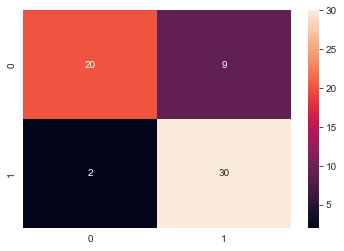

In [201]:
#Train Data Accuracy

model_LogisticReg = LogisticRegression(C= model_scores['Logistic Regression']['best_params']['C'], penalty =model_scores['Logistic Regression']['best_params']['penalty'],solver= model_scores['Logistic Regression']['best_params']['solver'])
  
model_LogisticReg.fit(X_train, y_train)

y_test_Log_pred=model_LogisticReg.predict(X_test)

LogisticReg_TrainData_Score = model_LogisticReg.score(X_train, y_train)
LogisticReg_TestData_Score = model_LogisticReg.score(X_test, y_test)
LogisticReg_accuracy_score = accuracy_score(y_test, y_test_Log_pred)
LogisticReg_conf_matrix = confusion_matrix(y_test, y_test_Log_pred)


print("Score for our training dataset with tuning is : {:.2f}%".format(LogisticReg_TrainData_Score *100) )
print("Score for our training dataset with tuning is : {:.2f}%".format(LogisticReg_TestData_Score *100) )

print("\n")
print("Model Accuracy after tuning is : {:.2f}%".format(LogisticReg_accuracy_score *100) )
print("\n")
print("classification report")
print(classification_report(y_test,y_test_Log_pred))
print("\n")
print("confussion matrix")
print(LogisticReg_conf_matrix)
sns.heatmap(LogisticReg_conf_matrix,annot=True)

#### Random Forest

Score for our training dataset with tuning is : 87.14%
Score for our testing dataset with tuning is : 78.69%


Model Accuracy after tuning is : 78.69%


classification report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.77      0.84      0.81        32

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



confussion matrix
[[21  8]
 [ 5 27]]


<AxesSubplot:>

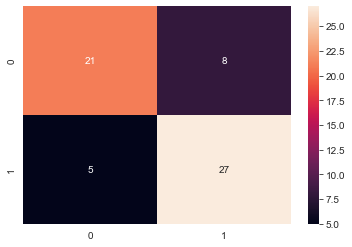

In [202]:
#Train Data Accuracy

model_RandomForest = RandomForestClassifier(n_estimators= model_scores['random-forest']['best_params']['n_estimators'], max_depth = model_scores['random-forest']['best_params']['max_depth'], criterion = 'entropy')

model_RandomForest.fit(X_train, y_train)

y_test_RF_pred=model_RandomForest.predict(X_test) 

RF_TrainData_Score = model_RandomForest.score(X_train, y_train)
RF_TestData_Score = model_RandomForest.score(X_test, y_test)
rf_accuracy_score = accuracy_score(y_test, y_test_RF_pred)
rf_conf_matrix = confusion_matrix(y_test, y_test_RF_pred)


print("Score for our training dataset with tuning is : {:.2f}%".format(RF_TrainData_Score *100) )
print("Score for our testing dataset with tuning is : {:.2f}%".format(RF_TestData_Score *100) )
print("\n")
print("Model Accuracy after tuning is : {:.2f}%".format(rf_accuracy_score *100) )
print("\n")
print("classification report")
print(classification_report(y_test,y_test_RF_pred))
print("\n")
print("confussion matrix")
print(rf_conf_matrix)
sns.heatmap(rf_conf_matrix,annot=True)



#### Model Evaluation

In [203]:
model_ev_fs = pd.DataFrame({'Model': ['Logistic Regression','Random Forest'],'Train Data Accuracy': [LogisticReg_TrainData_Score*100, RF_TrainData_Score*100], 'Test Data Accuracy': [LogisticReg_TestData_Score*100, RF_TestData_Score*100]})
model_ev_fs

Model  Train Data Accuracy  Test Data Accuracy
0  Logistic Regression            86.307054           81.967213
1        Random Forest            87.136929           78.688525

# Evaluating our tuned Machine Learning model classifier beyond accuracy

#### ROC curve and AUC score

In [204]:
y_pred_LogREg_probability = model_LogisticReg.predict_proba(X_test)[:,1]
pd.DataFrame({"Actual":y_test, "Predicted":y_pred_LogREg_probability})

Actual  Predicted
174       0   0.168300
88        1   0.727068
163       1   0.525272
243       0   0.167810
110       1   0.557762
..      ...        ...
194       0   0.552402
78        1   0.732899
248       0   0.587972
220       0   0.238127
235       0   0.404056

[61 rows x 2 columns]

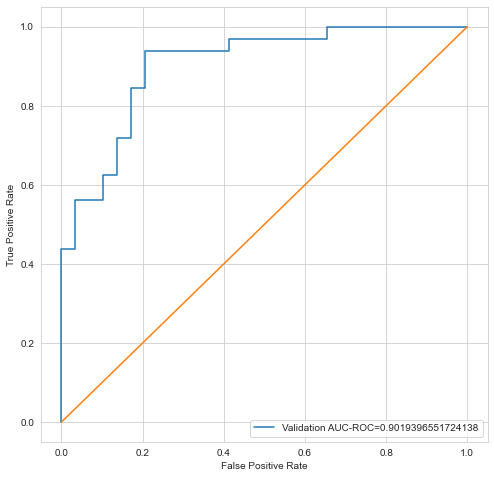

In [205]:
fpr, tpr, _ = roc_curve(y_test,y_pred_LogREg_probability) 
auc = roc_auc_score(y_test, y_pred_LogREg_probability) 
plt.figure(figsize=(8,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [206]:
auc = roc_auc_score(y_test, y_pred_LogREg_probability) 
print("Auc score for RF is : ", auc)

Auc score for RF is :  0.9019396551724138


confussion matrix
[[20  9]
 [ 2 30]]


<AxesSubplot:>

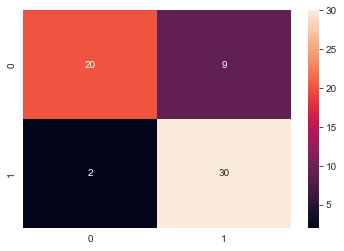

In [207]:
print("confussion matrix")
print(LogisticReg_conf_matrix)
sns.heatmap(LogisticReg_conf_matrix,annot=True)

In [208]:
print("classification report")
print(classification_report(y_test,y_test_Log_pred))
print("\n")

classification report
              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.77      0.94      0.85        32

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.84      0.82      0.82        61





# Conclusion :

1. Logistic Regression is better Model for the given Dataset for predection because its more stable than Random forest with Train data Accuracy = 86.307054	and Test Data Accuracy = 81.967213
2. AUC score is .88 which is above .50 which is very good

3. The male sex carries a higher risk for heart attacks and therefore medical screenings should be more targeted to that gender in order to help pick cases more easily.

4. Chest pain in most cases are the first warning signs, more patients should be sensitized on the need to mention that pain during visits to the doctor, even when they dont feel it severely at every hour of the day.

5. Resting ECG,especially Value 2 which represents probable or definite left ventricular hypertrophy by Estes’ criteria is also a high risk therefore it is advised that annual ECG tests to detect any ECG abnormalities ,especially when other risk factors are present, are carried out.

6. Increased fasting blood sugar is also an identified risk, thus measures to control fasting blood sugar such as regular exercises, treatment of diabetes mellitus if present and dietary restrictions of sugars are advised.